In [1]:
# Download matches table
! wget -O matches.html http://lczero.org/matches/
! rm -f wget-* 1>/dev/null

--2020-01-02 15:57:52--  http://lczero.org/matches/
Resolving lczero.org (lczero.org)... 104.24.115.1, 104.24.114.1, 2606:4700:30::6818:7201, ...
Connecting to lczero.org (lczero.org)|104.24.115.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘matches.html’

matches.html            [   <=>              ]  10,84M   926KB/s    in 13s     

2020-01-02 15:58:07 (838 KB/s) - ‘matches.html’ saved [11367827]



In [2]:
# Load matches table as DataFrame

import pandas as pd

df = pd.read_html("matches.html")[0]
df.head()

,Id,Run,Candidate,Current,Pass,Score,Elo Delta,Elo Error Margin,Done,Time
0,33730,2,59382,59392,test,+215 -173 =224,23.9,±21.9,True,2020-01-02 14:15:23 +00:00
1,33729,2,59389,59392,test,+188 -182 =239,3.4,±21.5,True,2020-01-02 14:15:23 +00:00
2,33728,2,59393,59392,true,+204 -185 =223,10.8,±21.9,True,2020-01-02 14:15:23 +00:00
3,33727,1,61768,61778,test,+109 -134 =387,-13.8,±16.8,True,2020-01-02 13:51:48 +00:00
4,33726,1,61775,61778,test,+123 -118 =386,2.8,±16.8,True,2020-01-02 13:51:48 +00:00


In [3]:
# Clean
df = df[df['Run'].values == 1]
# Select last run
df = df[df['Candidate'].values > 60000]

COLUMNS_TO_DROP = ('Done', 'Run',  )
for column in COLUMNS_TO_DROP : df.drop(column, axis=1, inplace=True) 



In [4]:
df.head()

,Id,Candidate,Current,Pass,Score,Elo Delta,Elo Error Margin,Time
3,33727,61768,61778,test,+109 -134 =387,-13.8,±16.8,2020-01-02 13:51:48 +00:00
4,33726,61775,61778,test,+123 -118 =386,2.8,±16.8,2020-01-02 13:51:48 +00:00
5,33725,61779,61778,true,+106 -128 =399,-12.1,±16.4,2020-01-02 13:51:48 +00:00
9,33721,61767,61777,test,+90 -129 =411,-21.5,±16.0,2020-01-02 12:29:42 +00:00
10,33720,61774,61777,test,+108 -128 =390,-11.1,±16.7,2020-01-02 12:29:42 +00:00


In [5]:
df['networks_distance'] = df['Current'] - df['Candidate'] 
df['networks_distance'].value_counts().to_dict()


{3: 1775, -1: 1770, 10: 1768, 30: 115, 100: 67, 300: 19, -2: 7, -3: 1}

In [6]:
DISTANCE_NETWORK_TO_ANALYZE=100
df = df[df['networks_distance'].values == DISTANCE_NETWORK_TO_ANALYZE]

In [7]:
import numpy as np
import matplotlib.pyplot as plt


df['Elo Gain'] = df['Elo Delta'] * -1 

df.sort_values("Id", inplace=True, ascending=True)
df

,Id,Candidate,Current,Pass,Score,Elo Delta,Elo Error Margin,Time,networks_distance,Elo Gain
9940,23790,60025,60125,test,+0 -3001 =45,-851.3,±52.2,2019-08-05 00:30:09 +00:00,100,851.3
9794,23936,60050,60150,test,+57 -2842 =145,-540.9,±25.9,2019-08-06 15:24:07 +00:00,100,540.9
9621,24109,60075,60175,test,+169 -2487 =387,-347.6,±15.9,2019-08-08 13:01:11 +00:00,100,347.6
9433,24297,60100,60200,test,+324 -2090 =619,-231.3,±12.6,2019-08-10 12:34:57 +00:00,100,231.3
9294,24436,60125,60225,test,+480 -1683 =887,-144.9,±10.9,2019-08-12 09:25:41 +00:00,100,144.9
9179,24551,60150,60250,test,+608 -1454 =988,-99.0,±10.3,2019-08-13 22:15:48 +00:00,100,99.0
9066,24664,60175,60275,test,+633 -1362 =1050,-84.8,±10.1,2019-08-15 19:16:35 +00:00,100,84.8
8981,24749,60200,60300,test,+650 -1220 =1178,-65.7,±9.7,2019-08-17 13:56:23 +00:00,100,65.7
8887,24843,60225,60325,test,+679 -1177 =1181,-57.5,±9.7,2019-08-19 14:14:39 +00:00,100,57.5
8753,24977,60250,60350,test,+725 -1133 =1173,-47.1,±9.7,2019-08-22 02:01:13 +00:00,100,47.1


<module 'matplotlib.pyplot' from '/home/usuario1/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

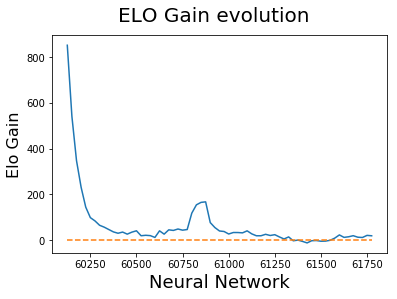

In [8]:

from matplotlib import pyplot as plt    

fig = plt.figure()
plt.plot(df.Current, df['Elo Gain'])
fig.suptitle('ELO Gain evolution', fontsize=20)
plt.xlabel('Neural Network', fontsize=18)
plt.ylabel('Elo Gain', fontsize=16)

plt.plot((df.Current.min(), df.Current.max()), (0, 0), '--') 
plt




<module 'matplotlib.pyplot' from '/home/usuario1/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

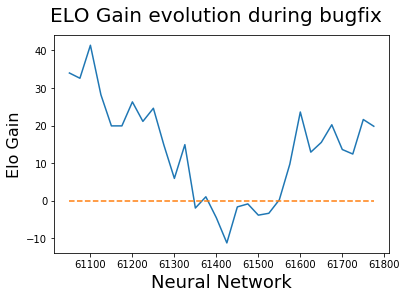

In [9]:
from matplotlib import pyplot as plt    

LAST_ELEMENTS=30

fig = plt.figure()
plt.plot(df.Current.tail(LAST_ELEMENTS), df['Elo Gain'].tail(LAST_ELEMENTS))
fig.suptitle('ELO Gain evolution during bugfix', fontsize=20)
plt.xlabel('Neural Network', fontsize=18)
plt.ylabel('Elo Gain', fontsize=16)

plt.plot((df.Current.tail(LAST_ELEMENTS).min(), df.Current.tail(LAST_ELEMENTS).max()), (0, 0), '--') 
plt
